In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

1. Imports

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=200)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100

# matplotlib and seaborn for plotting

# %matplotlib inline
sns.set(style="darkgrid")

## 2. Read in Data

In [6]:
!ls ../data/hapt_data_set/RawData | grep acc | head -3

acc_exp01_user01.txt
acc_exp02_user01.txt
acc_exp03_user02.txt


In [7]:
!ls ../data/hapt_data_set/RawData | grep gyro | head -3

gyro_exp01_user01.txt
gyro_exp02_user01.txt
gyro_exp03_user02.txt


In [8]:
%%time
root = '../data/hapt_data_set/RawData/'
acc = pd.read_table(root + 'acc_exp01_user01.txt', sep=' ', header=None, names=['x', 'y', 'z'])
gyro = pd.read_table(root + 'gyro_exp01_user01.txt', sep=' ', header=None, names=['x', 'y', 'z'])

CPU times: user 21 ms, sys: 12.4 ms, total: 33.4 ms
Wall time: 46.1 ms


## 3. Plot Acceleration & Gyroscope Data


- The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
- The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.
- Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.
- Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

## 3.0 Plot raw acceleration & gyroscope data (50Hz)


- The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
- The time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.

In [9]:
print('acc', acc.shape)
display(acc.head(3))

acc (20598, 3)


,x,y,z
0,0.918056,-0.112500,0.509722
1,0.911111,-0.093056,0.537500
2,0.881944,-0.086111,0.513889


In [10]:
print('gyro', gyro.shape)
display(gyro.head(3))

gyro (20598, 3)


,x,y,z
0,-0.054978,-0.069639,-0.030849
1,-0.012523,0.019242,-0.038485
2,-0.023518,0.276417,0.006414


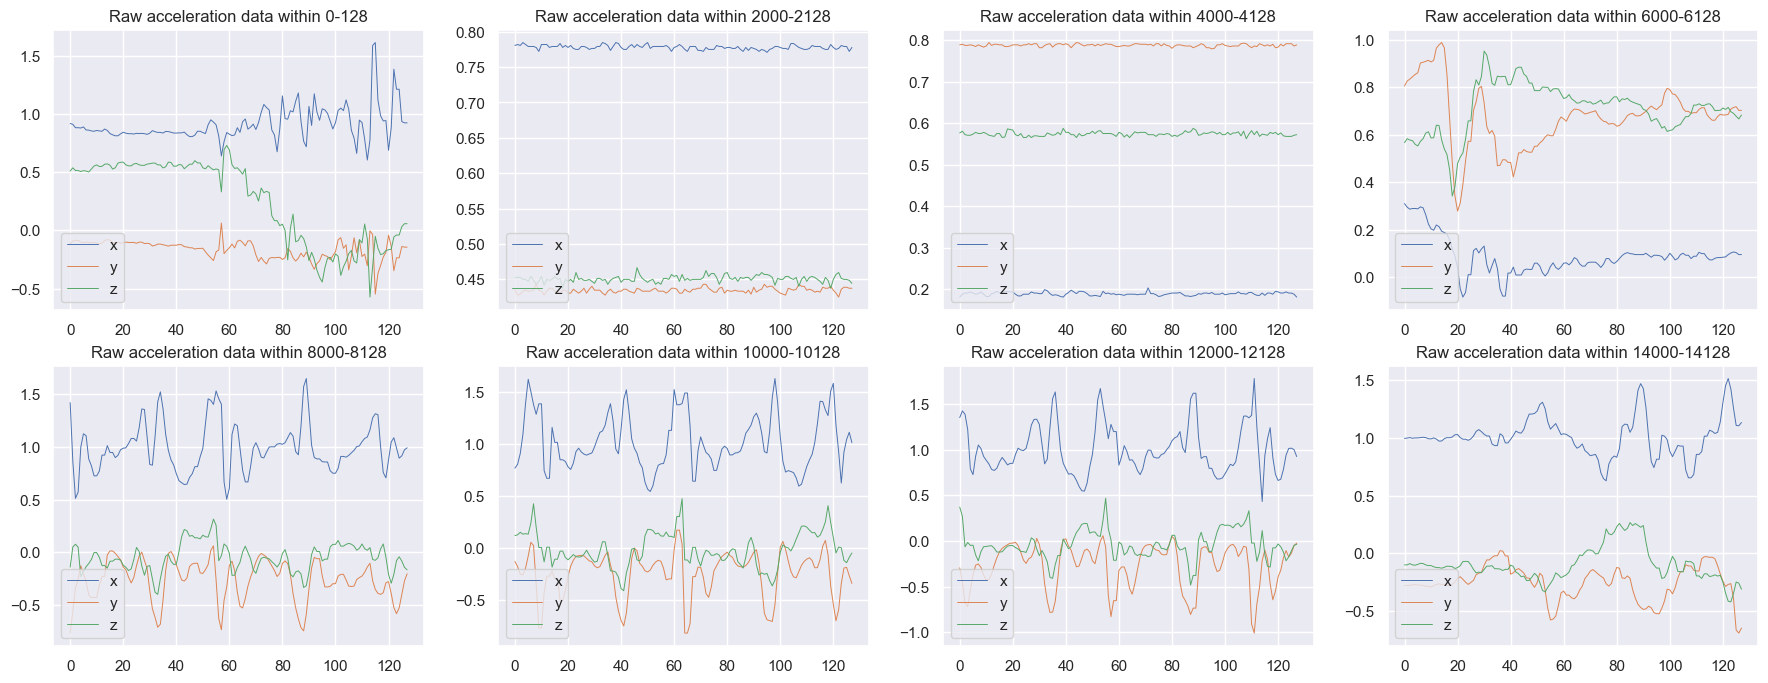

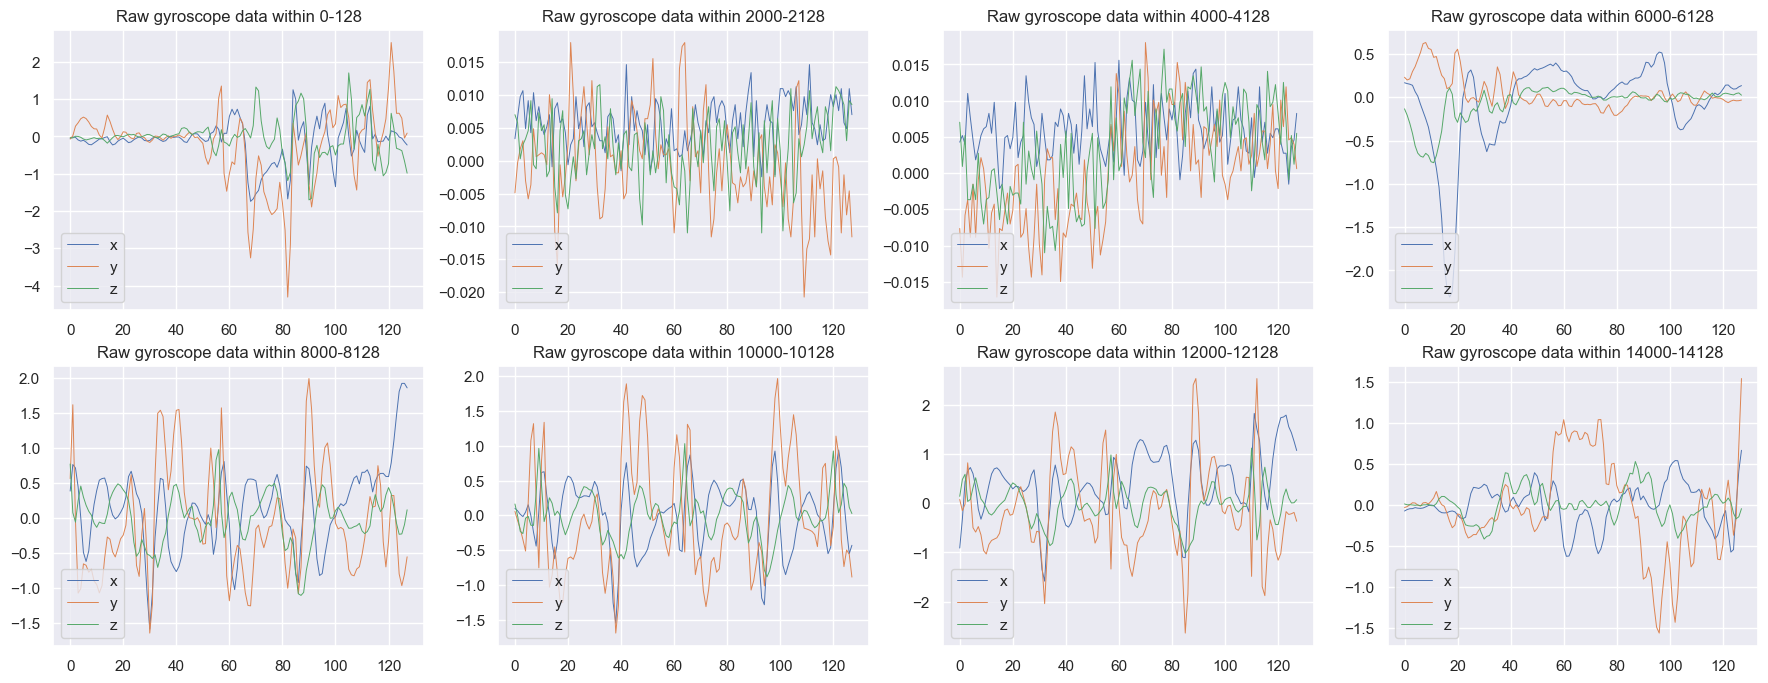

In [11]:
# Plot raw acceleration data (50Hz) within 128 readings (2.56 sec)
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Raw acceleration data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot raw gyroscope data (50Hz) within 128 readings (2.56 sec)
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Raw gyroscope data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

## 3.1 Remove noise by filtering


- Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.
- Median filter was applied with filter length of 5 in both acceleration and gyroscope data.

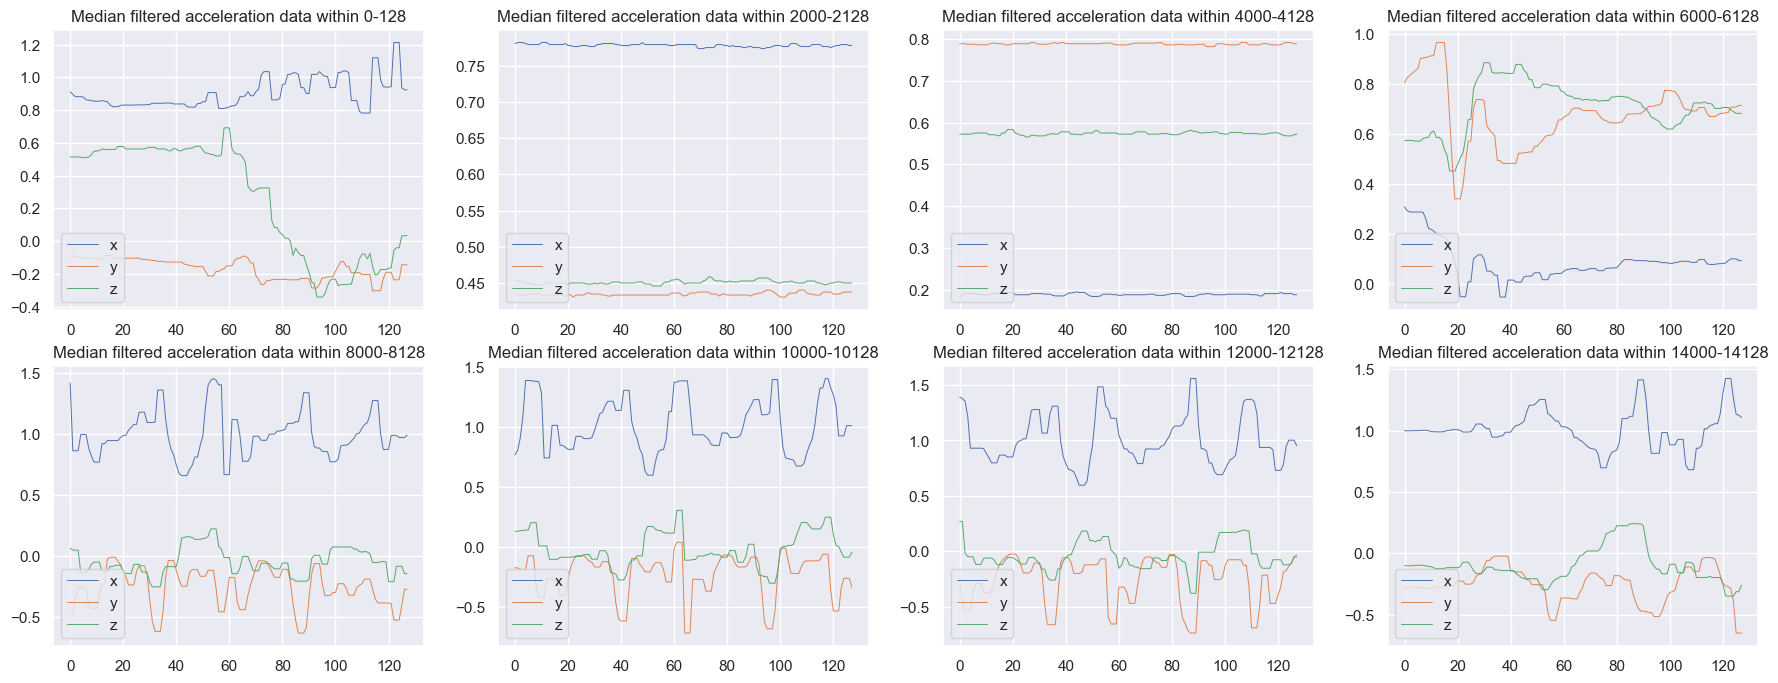

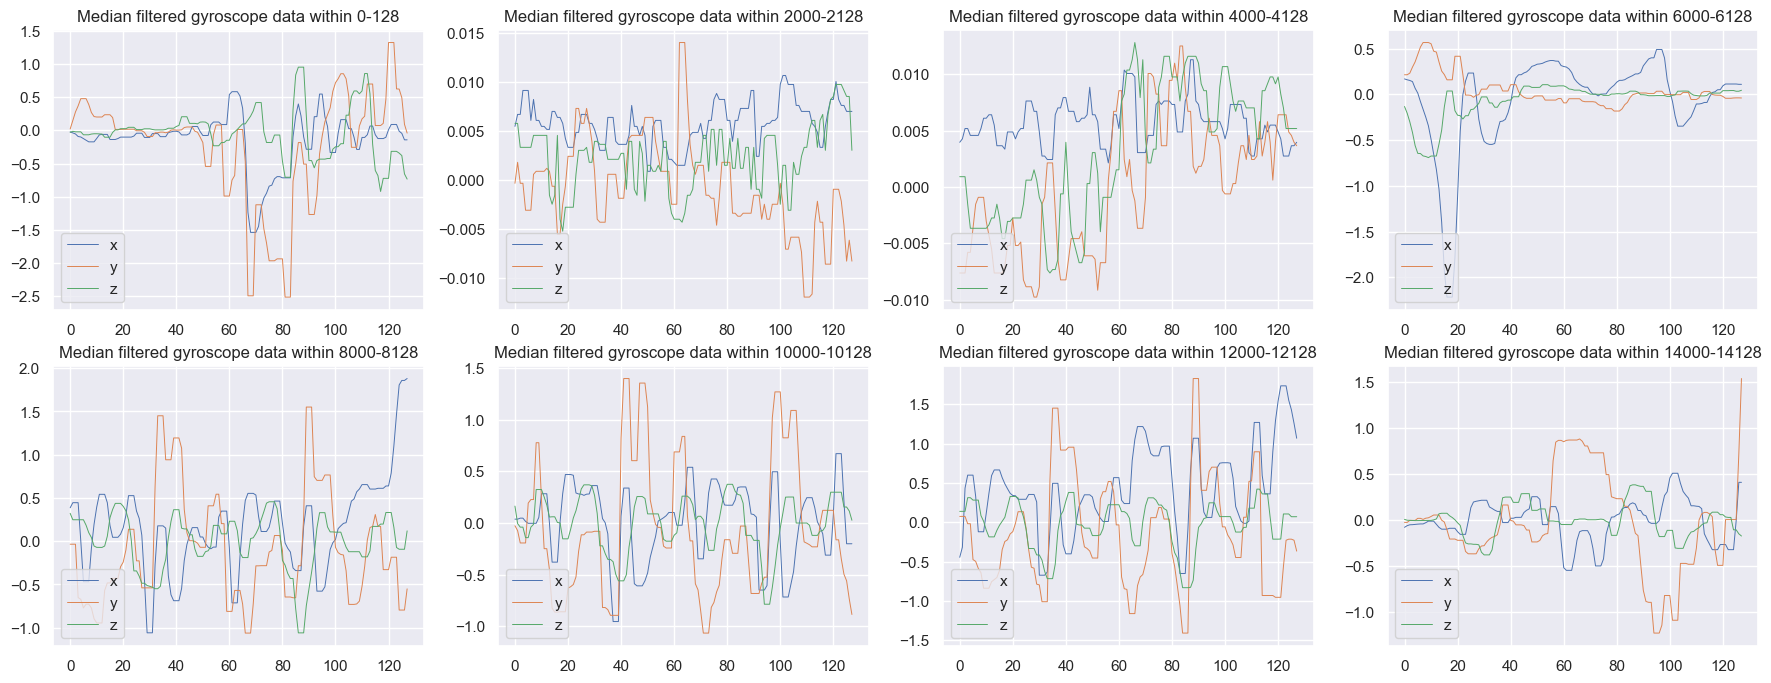

In [12]:
# Apply median filter with filter length 5.
acc_med = acc.rolling(window=5, center=True, min_periods=1).median()
gyro_med = gyro.rolling(window=5, center=True, min_periods=1).median()


# Plot acceleration data every128 readings (2.56 sec) with median filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median filtered acceleration data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot raw gyroscope data (50Hz) every128 readings (2.56 sec) with median filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_med.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median filtered gyroscope data within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

In [13]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 20 Hz.
from scipy import signal
fs = 50  # sampling frequency
fc = 20  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

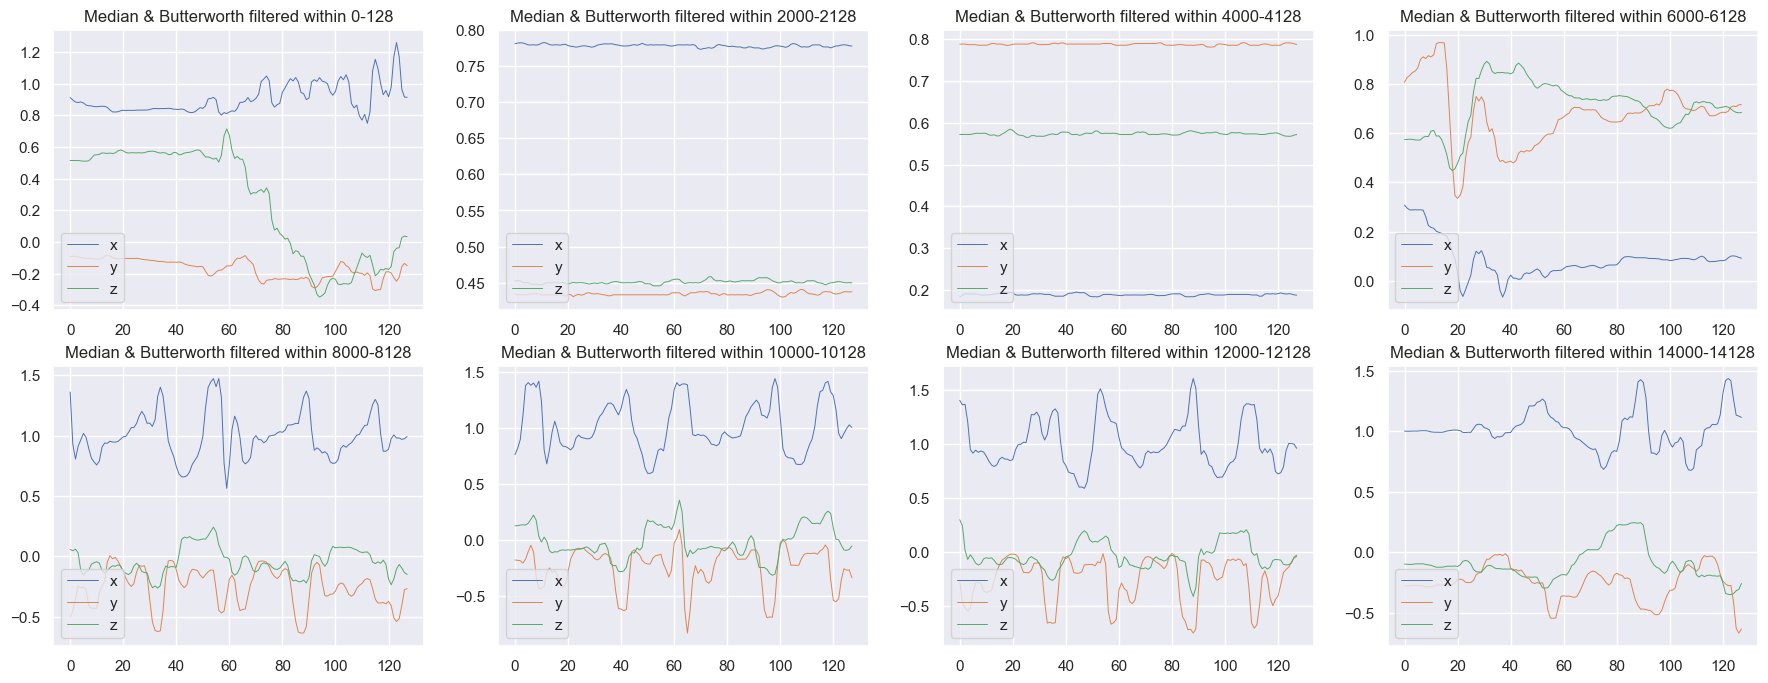

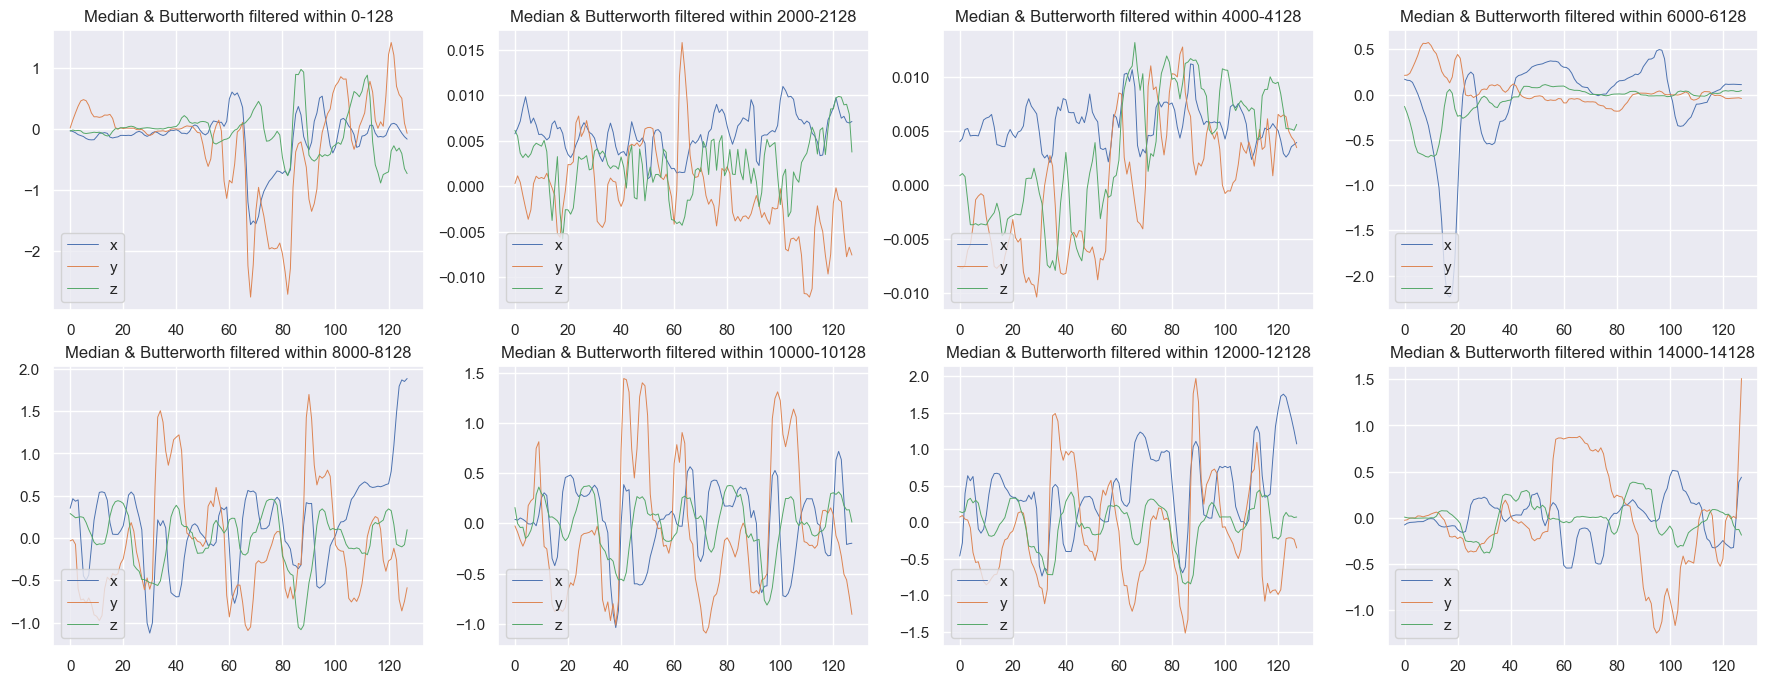

In [14]:
acc_med_but = pd.DataFrame(signal.filtfilt(b, a, acc_med, axis=0), columns=['x', 'y', 'z'])
gyro_med_but = pd.DataFrame(signal.filtfilt(b, a, gyro_med, axis=0), columns=['x', 'y', 'z'])


# Plot acceleration data within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med_but.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median & Butterworth filtered within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot raw gyroscope data (50Hz) within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_med_but.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Median & Butterworth filtered within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

## 3.2.1 Separate acceleration signal into body and gravity acceleratin signals

- The acceleration signal was separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.


In [15]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 0.3 Hz.
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

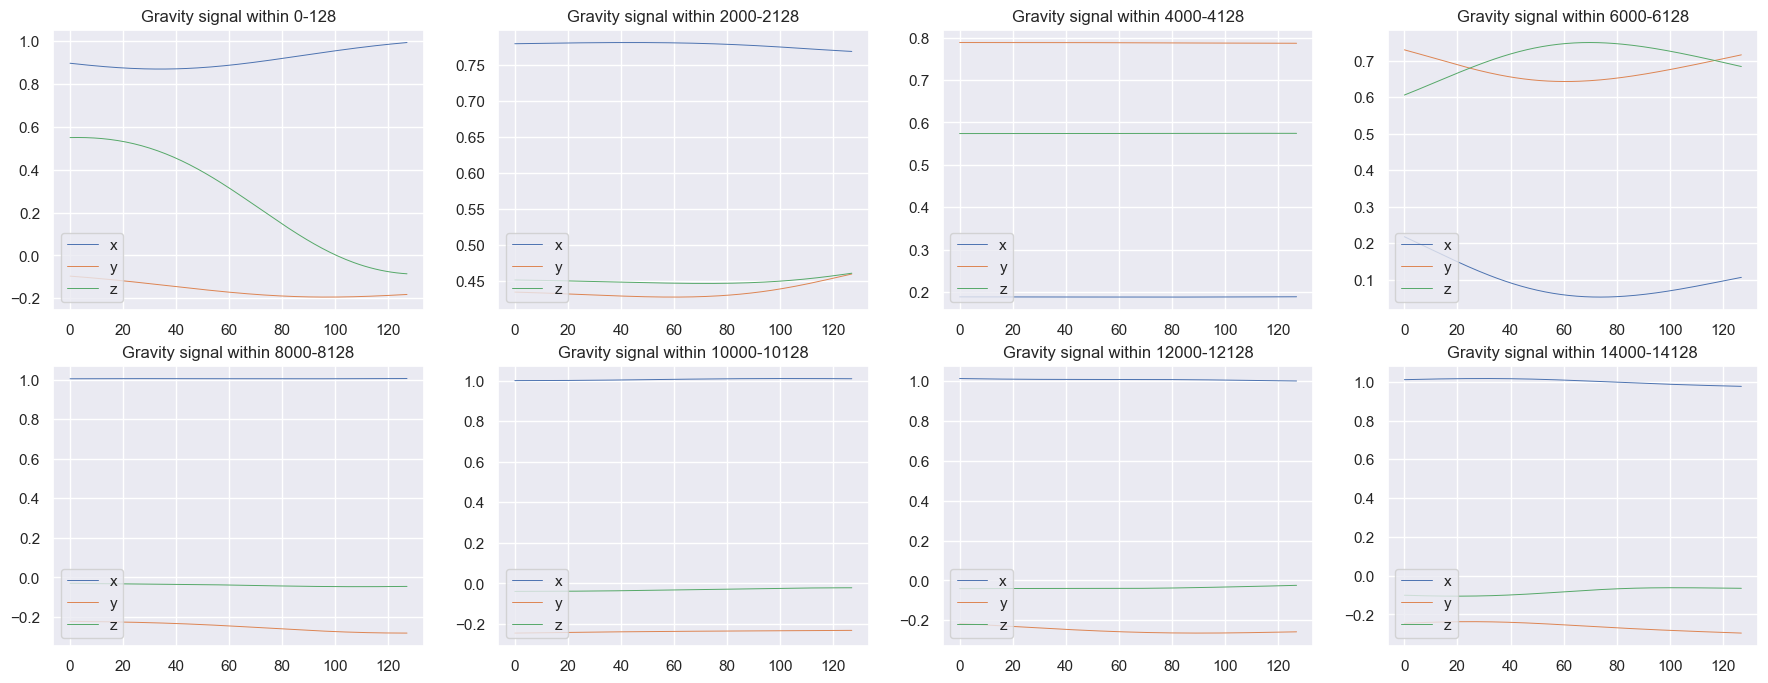

In [16]:
acc_med_but_grav = pd.DataFrame(columns=['x', 'y', 'z'])

for axis in ['x','y','z']:
    acc_arr = acc_med_but[axis].values
    acc_med_but_grav[axis] = signal.filtfilt(b, a, acc_arr)


# Plot gravity acceleration data within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med_but_grav.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Gravity signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

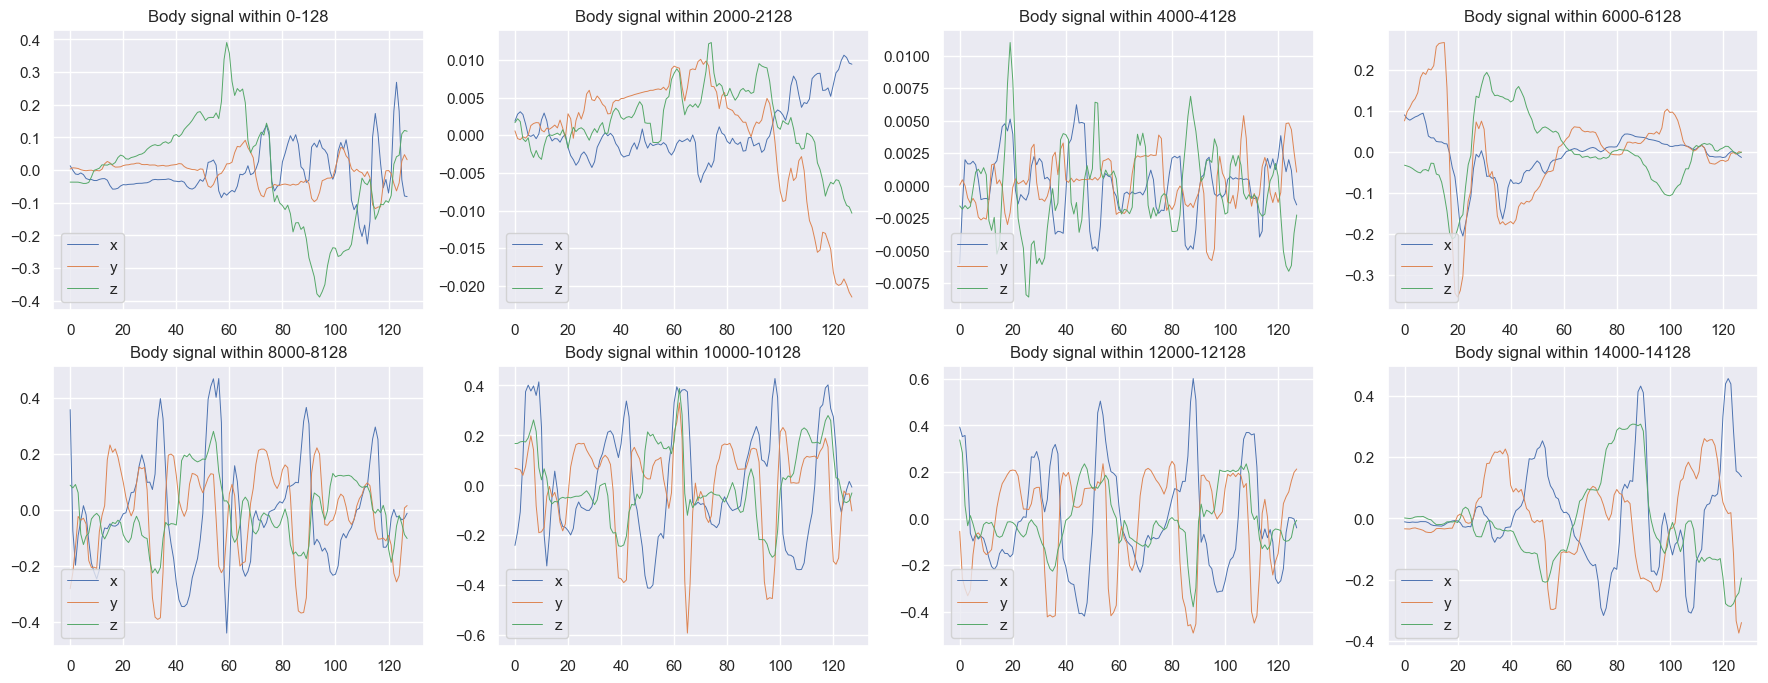

In [17]:
# Substract gravity acceleration from denoised acceleration sigal.
acc_med_but_body = acc_med_but - acc_med_but_grav


# Plot body acceleration data within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med_but_body.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Body signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

## 3.2.2 Separate acceleration signal into body and gravity acceleratin signals by each window

In [18]:
# Apply 3rd order low pass Butterworth filter with a corner frequency of 0.3 Hz.
fs = 50  # sampling frequency
fc = 0.3  # cutoff frequency

w = fc / (fs / 2)  # Normalize the frequency
b, a = signal.butter(3, w, 'low')  # 3rd order low pass Butterworth filter

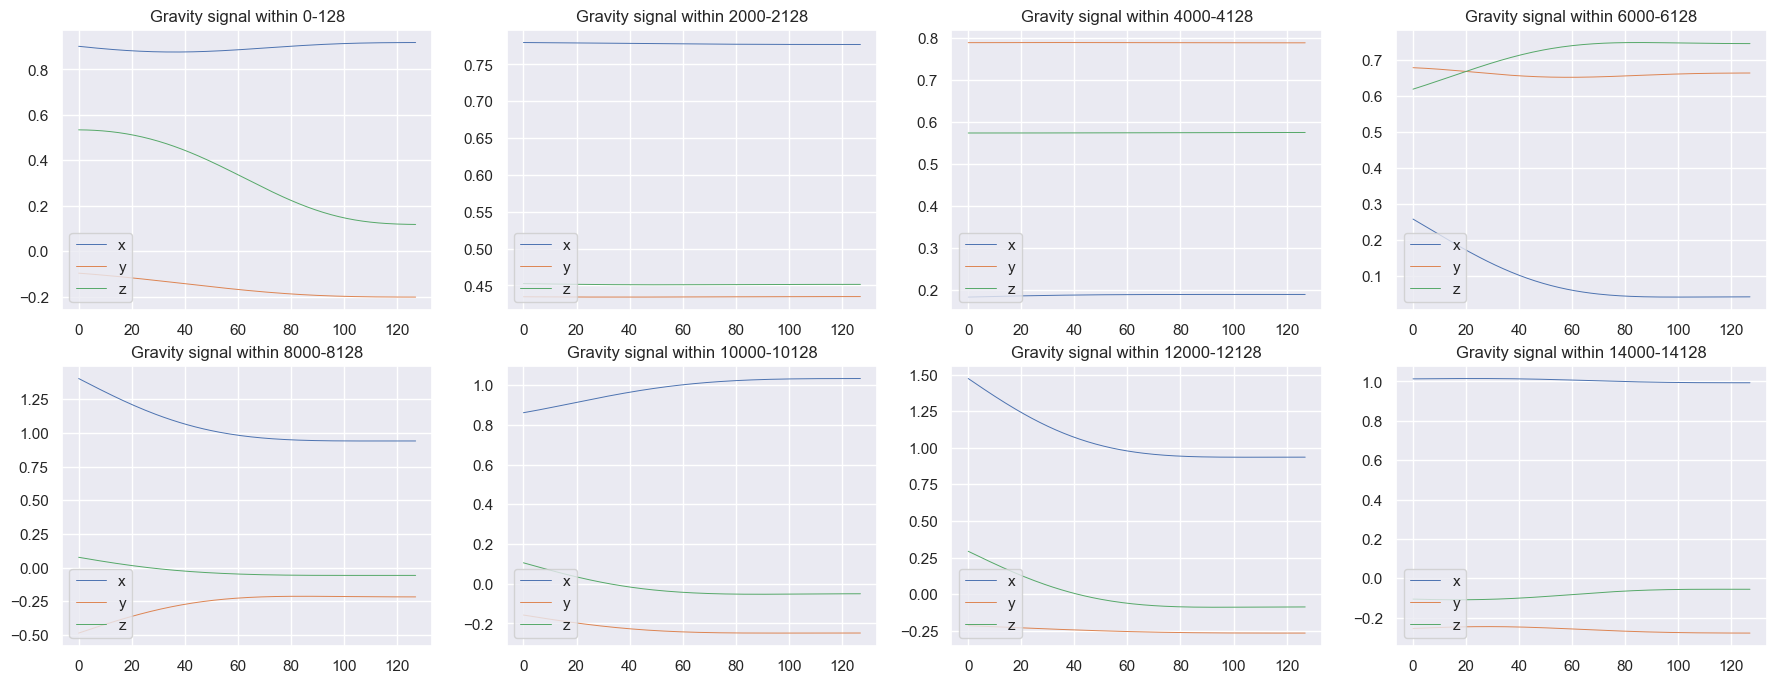

In [19]:
acc_med_but_grav = pd.DataFrame(columns=['x', 'y', 'z'])

# for axis in ['x','y','z']:
    # acc_arr = acc_med_but[axis].values
    # acc_med_but_grav[axis] = signal.filtfilt(b, a, acc_arr)


# Plot gravity acceleration data within 128 readings (2.56 sec) with median filter & Butterworth filter
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    df = acc_med_but.iloc[i*2000:i*2000+128]
    for axis in ['x', 'y', 'z']:
        acc_arr = df[axis].values
        arr = signal.filtfilt(b, a, acc_arr)

        ax[i].plot(arr, label=axis, linewidth=0.7)
    ax[i].set_title(f"Gravity signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

## 3.3 Derive body linear acceleration and angular velocity to obtain Jerk signals


- The body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

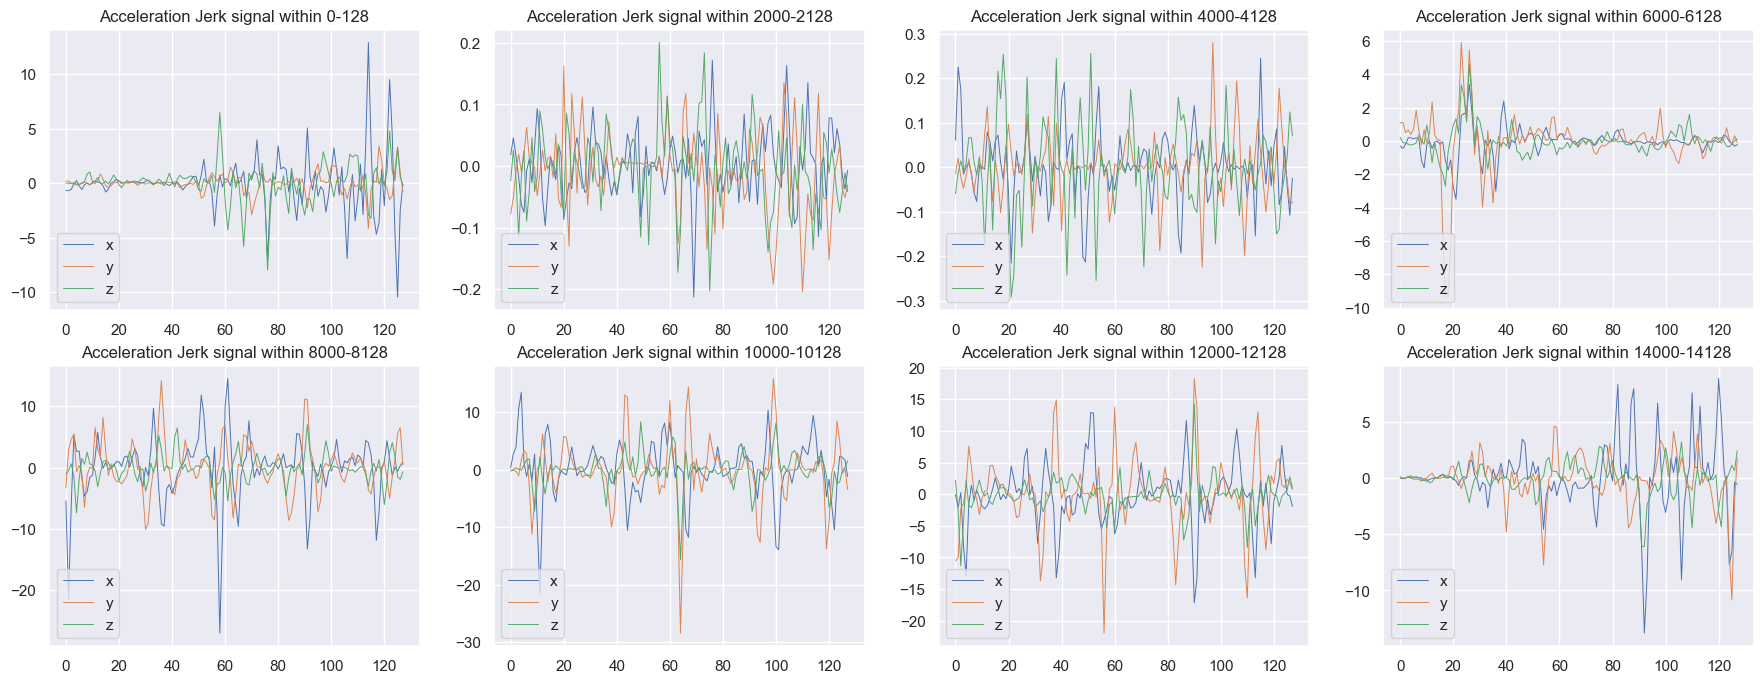

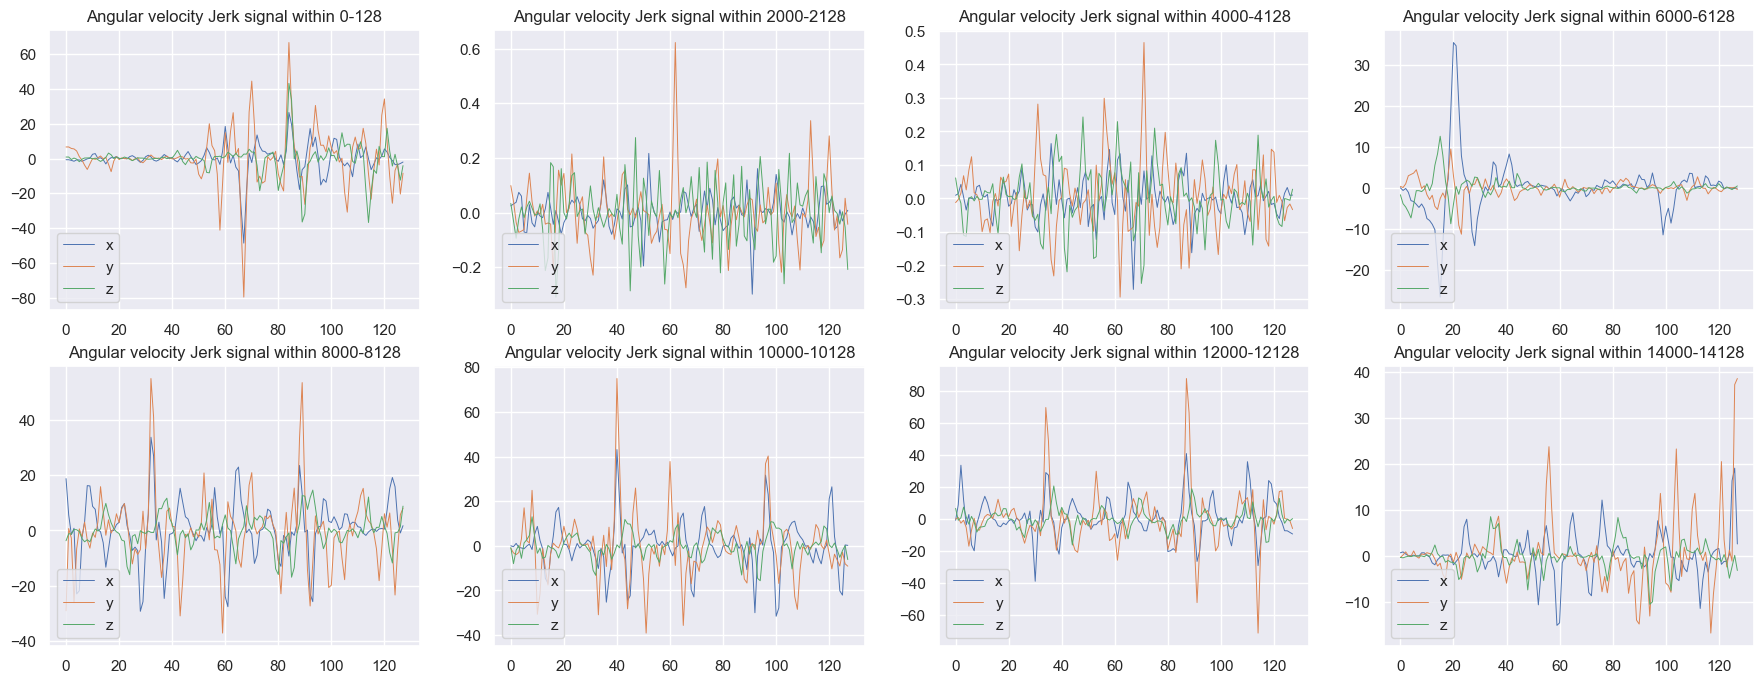

In [20]:
# Calculate Jerk signals.
acc_med_but_body_jerk = acc_med_but_body.diff(periods=1)  # Calculate difference
acc_med_but_body_jerk.iloc[0] = acc_med_but_body_jerk.iloc[1]  # Fillna
acc_med_but_body_jerk = acc_med_but_body_jerk / 0.02  # Derive in time (50Hz)

gyro_med_but_jerk = gyro_med_but.diff(periods=1)  # Calculate difference
gyro_med_but_jerk.iloc[0] = gyro_med_but_jerk.iloc[1]  # Fillna
gyro_med_but_jerk = gyro_med_but_jerk / 0.02  # Derive in time (50Hz)


# Plot acceleration Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(acc_med_but_body_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Acceleration Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()


# Plot angular velocity Jerk signals
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    for axis in ['x', 'y', 'z']:
        ax[i].plot(gyro_med_but_jerk.iloc[i*2000:i*2000+128][axis].values, label=axis, linewidth=0.7)
    ax[i].set_title(f"Angular velocity Jerk signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

## 3.4 Calculated the magnitude of three-dimensional signals


- Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag).

In [21]:
# Calculate the magnitude of three-dimensional signals using the Euclidean norm.
from numpy.linalg import norm

acc_med_but_body_mag = norm(acc_med_but_body, ord=2, axis=1)
acc_med_but_grav_mag = norm(acc_med_but_grav, ord=2, axis=1)
acc_med_but_body_jerk_mag = norm(acc_med_but_body_jerk, ord=2, axis=1)
gyro_med_but_mag = norm(gyro_med_but, ord=2, axis=1)
gyro_med_but_body_mag = norm(gyro_med_but_jerk, ord=2, axis=1)

print(acc_med_but_body_mag.shape)
print(acc_med_but_grav_mag.shape)
print(acc_med_but_body_jerk_mag.shape)
print(gyro_med_but_mag.shape)
print(gyro_med_but_body_mag.shape)

(20598,)
(0,)
(20598,)
(20598,)
(20598,)


## 3.5 Apply FFT


- Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals).

In [22]:
N =128
dt = 0.02  # 50Hz
t = np.arange(0, N*dt, dt)  # time axis
freq = np.linspace(0, 1.0 / dt, N)  # frequency axis
win = np.hamming(N)  # hamming window

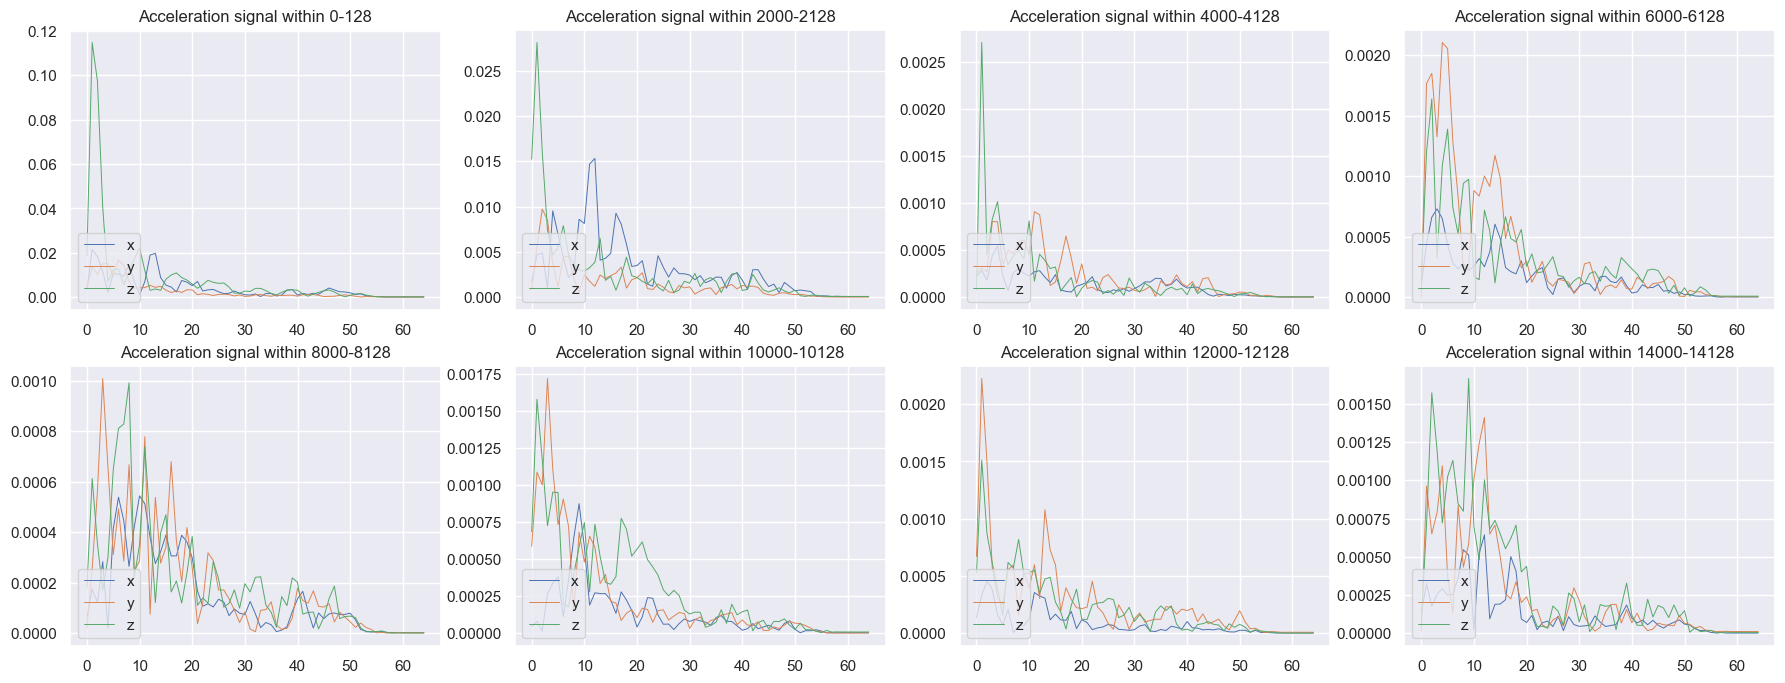

In [23]:
# Plot with hamming
f, ax = plt.subplots(2, 4, figsize=(22, 8))
ax = ax.flatten()
for i in range(8):
    df = pd.DataFrame(columns=list('xyz'))

    for axis in ['x', 'y', 'z']:
        df[axis] = acc_med_but_body.iloc[i*128:i*128+128][axis] * win

    F = np.fft.fft(df, axis=0)
    F = pd.DataFrame(F, columns=['x', 'y', 'z'])

    F = F[:N//2+1]

    # Calculare amplitude spectrum
    Amp = np.abs(F)
    Amp = pd.DataFrame(Amp, columns=['x', 'y', 'z'])

    Amp = Amp / N * 2
    Amp.iloc[0] = Amp.iloc[0] / 2

    for axis in ['x', 'y', 'z']:
        ax[i].plot(Amp[axis].values, label=axis, linewidth=0.7)

    ax[i].set_title(f"Acceleration signal within {i*2000}-{i*2000+128}")
    ax[i].legend(loc='lower left')
plt.show()

In [1]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

2023-05-06 16:00:26.299497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 16:00:28.578659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-06 16:00:32.137280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


[]